<a href="https://colab.research.google.com/github/kittu1233/creditcard-fraud-detection-/blob/main/creditcardfraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

try:
    df_train = pd.read_csv('fraudTrain.csv')
    df_test = pd.read_csv('fraudTest.csv')
    display(df_train.head())
    display(df_test.head())
except FileNotFoundError:
    print("Error: One or both of the CSV files were not found.")
    df_train = None
    df_test = None
except pd.errors.ParserError:
    print("Error: There was an issue parsing one or both of the CSV files.")
    df_train = None
    df_test = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df_train = None
    df_test = None

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2.703186e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,6.304233e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,3.885949e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3.534094e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,3.755342e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


df_train shape: (46718, 23)
df_test shape: (38896, 23)

df_train data types:
 Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                   float64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                      float64
lat                      float64
long                     float64
city_pop                 float64
job                       object
dob                       object
trans_num                 object
unix_time                float64
merch_lat                float64
merch_long               float64
is_fraud                 float64
dtype: object

df_test data types:
 Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  ob

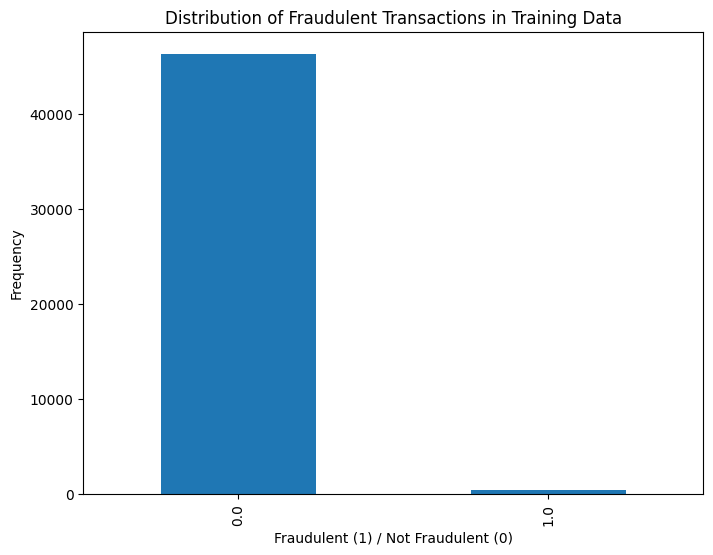


df_train 'category' value counts:
category
gas_transport     4780
grocery_pos       4467
home              4445
shopping_pos      4181
kids_pets         3954
shopping_net      3589
entertainment     3336
food_dining       3319
personal_care     3256
health_fitness    3114
misc_pos          2814
misc_net          2402
grocery_net       1657
travel            1403
Name: count, dtype: int64

df_test 'category' value counts:
category
gas_transport     3793
home              3733
grocery_pos       3531
kids_pets         3500
shopping_pos      3443
shopping_net      2980
food_dining       2842
entertainment     2820
personal_care     2811
health_fitness    2628
misc_pos          2372
misc_net          1847
grocery_net       1335
travel            1261
Name: count, dtype: int64

df_train 'gender' value counts:
gender
F    25535
M    21182
Name: count, dtype: int64

df_test 'gender' value counts:
gender
F    21331
M    17564
Name: count, dtype: int64

df_train 'state' value counts:
state
TX  

In [3]:
# Data Shape and Types
print("df_train shape:", df_train.shape)
print("df_test shape:", df_test.shape)
print("\ndf_train data types:\n", df_train.dtypes)
print("\ndf_test data types:\n", df_test.dtypes)

# Summary Statistics
print("\ndf_train numerical features summary statistics:\n", df_train.describe())
print("\ndf_test numerical features summary statistics:\n", df_test.describe())

# Missing Values
print("\ndf_train missing values:\n", df_train.isnull().sum())
print("\ndf_test missing values:\n", df_test.isnull().sum())

# Target Variable Distribution (df_train only)
print("\ndf_train 'is_fraud' value counts:\n", df_train['is_fraud'].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
df_train['is_fraud'].value_counts().plot(kind='bar')
plt.title('Distribution of Fraudulent Transactions in Training Data')
plt.xlabel('Fraudulent (1) / Not Fraudulent (0)')
plt.ylabel('Frequency')
plt.show()

# Categorical Variable Exploration
categorical_cols = ['category', 'gender', 'state', 'job']  # Example categorical columns
for col in categorical_cols:
    print(f"\ndf_train '{col}' value counts:\n{df_train[col].value_counts()}")
    print(f"\ndf_test '{col}' value counts:\n{df_test[col].value_counts()}")

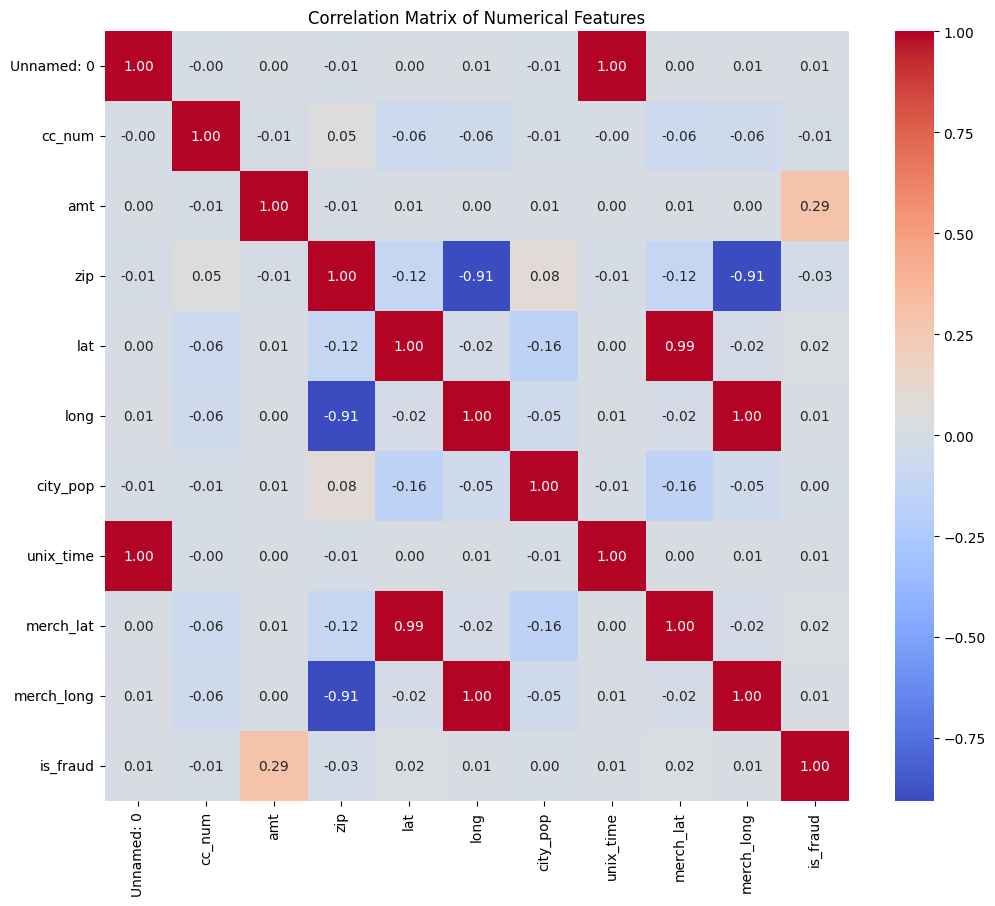

Correlations with 'is_fraud':
 Unnamed: 0    0.006870
cc_num       -0.007712
amt           0.292754
zip          -0.025358
lat           0.017816
long          0.009944
city_pop      0.000867
unix_time     0.006271
merch_lat     0.017807
merch_long    0.009855
Name: is_fraud, dtype: float64


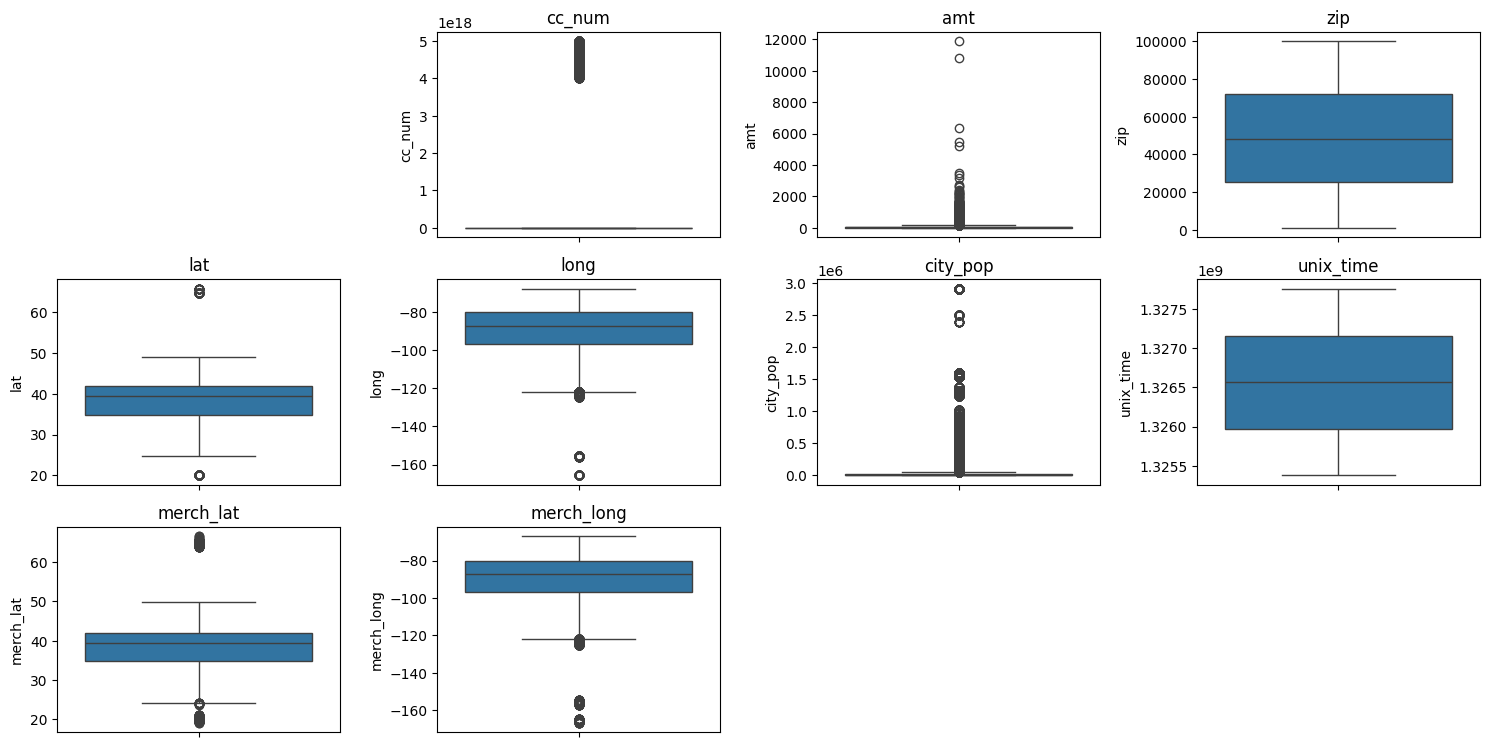

Percentage of Fraudulent Transactions: 0.91%
Percentage of Non-Fraudulent Transactions: 99.09%


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation analysis
numerical_features = df_train.select_dtypes(include=['number']).columns
correlation_matrix = df_train[numerical_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Identify features highly correlated with 'is_fraud'
correlations_with_fraud = correlation_matrix['is_fraud'].drop('is_fraud')
print("Correlations with 'is_fraud':\n", correlations_with_fraud)

# Outlier detection using box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    if col != 'is_fraud' and col != 'Unnamed: 0':
        plt.subplot(4, 4, i+1)  # Adjust the subplot grid as needed
        sns.boxplot(y=df_train[col])
        plt.title(col)
plt.tight_layout()
plt.show()

# Class Imbalance
fraud_percentage = (df_train['is_fraud'].value_counts(normalize=True) * 100)
print(f"Percentage of Fraudulent Transactions: {fraud_percentage[1]:.2f}%")
print(f"Percentage of Non-Fraudulent Transactions: {fraud_percentage[0]:.2f}%")


Value counts for 'category':
category
gas_transport     4780
grocery_pos       4467
home              4445
shopping_pos      4181
kids_pets         3954
shopping_net      3589
entertainment     3336
food_dining       3319
personal_care     3256
health_fitness    3114
misc_pos          2814
misc_net          2402
grocery_net       1657
travel            1403
Name: count, dtype: int64


<Figure size 1200x600 with 0 Axes>

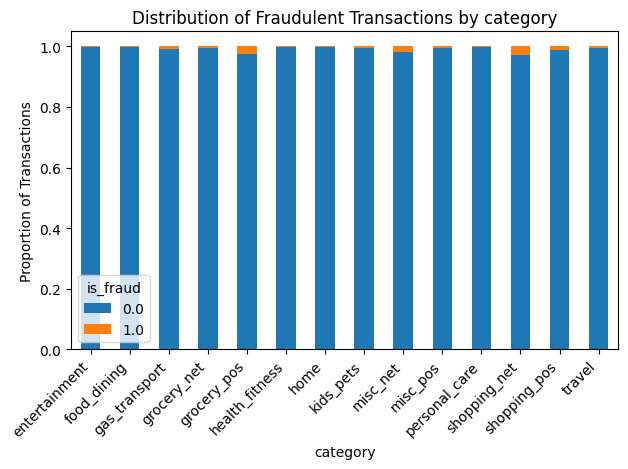


Value counts for 'gender':
gender
F    25535
M    21182
Name: count, dtype: int64


<Figure size 1200x600 with 0 Axes>

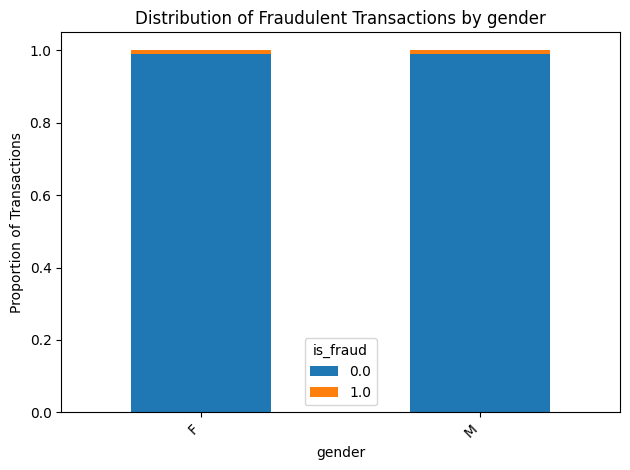


Value counts for 'state':
state
TX    3385
NY    3058
PA    2869
CA    1991
MI    1692
OH    1658
IL    1585
FL    1536
AL    1497
MO    1411
AR    1142
NC    1114
VA    1096
MN    1088
WI    1018
KY    1013
SC     982
IN     981
IA     956
WV     954
MD     924
OK     921
GA     920
NJ     918
KS     863
NE     853
MS     742
LA     737
WA     692
OR     668
WY     646
TN     627
ME     626
NM     620
CO     497
ND     488
MT     458
AZ     444
VT     439
MA     429
SD     419
UT     365
CT     313
NH     293
ID     217
NV     194
DC     157
HI     105
AK      93
RI      23
Name: count, dtype: int64


<Figure size 1200x600 with 0 Axes>

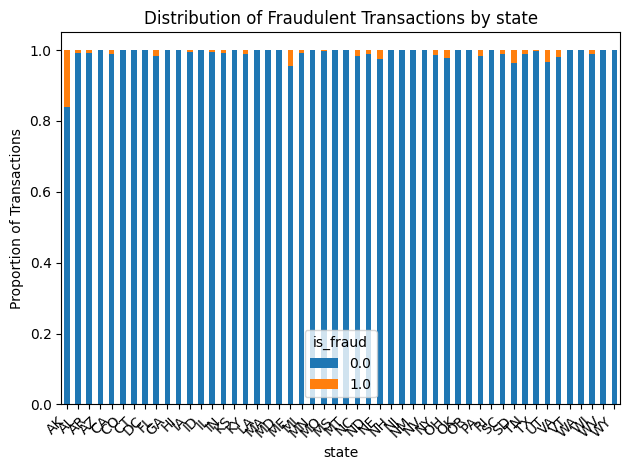


Value counts for 'job':
job
Exhibition designer                340
Film/video editor                  323
Surveyor, land/geomatics           322
Systems developer                  310
Naval architect                    301
                                  ... 
Investment banker, operational      13
TEFL teacher                        13
Producer, television/film/video     13
Occupational therapist              12
Engineer, materials                 11
Name: count, Length: 475, dtype: int64


<Figure size 1200x600 with 0 Axes>

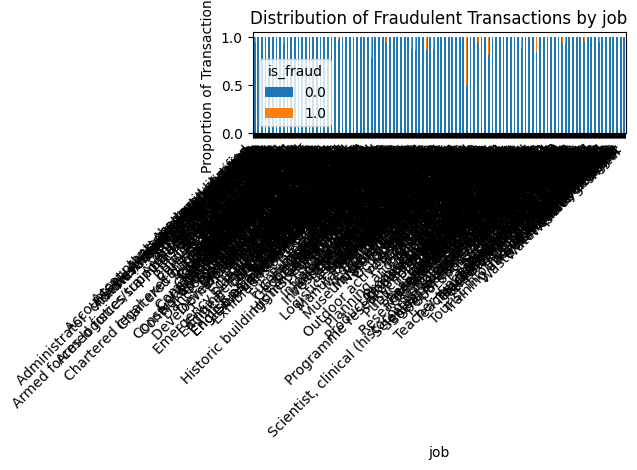


Value counts for 'merchant':
merchant
fraud_Cormier LLC                      158
fraud_Kilback LLC                      150
fraud_Boyer PLC                        133
fraud_Dickinson Ltd                    131
fraud_Schumm PLC                       121
                                      ... 
fraud_Kilback, Nitzsche and Leffler     21
fraud_Lemke and Sons                    20
fraud_Monahan, Hermann and Johns        20
fraud_Tillman LLC                       20
fraud_Reichert-Weissnat                 16
Name: count, Length: 693, dtype: int64


<Figure size 1200x600 with 0 Axes>

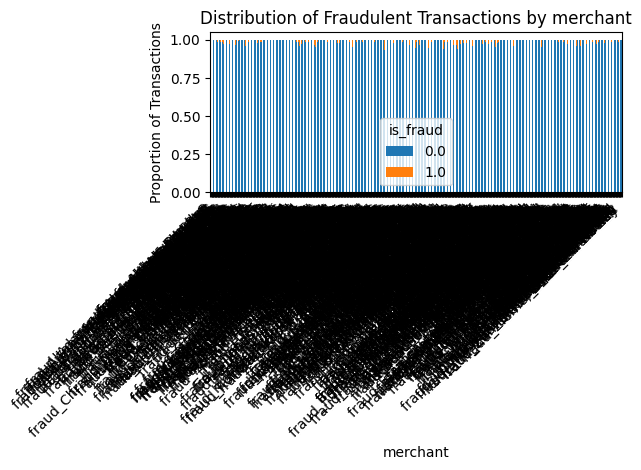

In [5]:
import matplotlib.pyplot as plt
categorical_cols = ['category', 'gender', 'state', 'job', 'merchant']
for col in categorical_cols:
    print(f"\nValue counts for '{col}':\n{df_train[col].value_counts()}")
    plt.figure(figsize=(12, 6))
    df_train.groupby(col)['is_fraud'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
    plt.title(f'Distribution of Fraudulent Transactions by {col}')
    plt.xlabel(col)
    plt.ylabel('Proportion of Transactions')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='is_fraud')
    plt.tight_layout()
    plt.show()

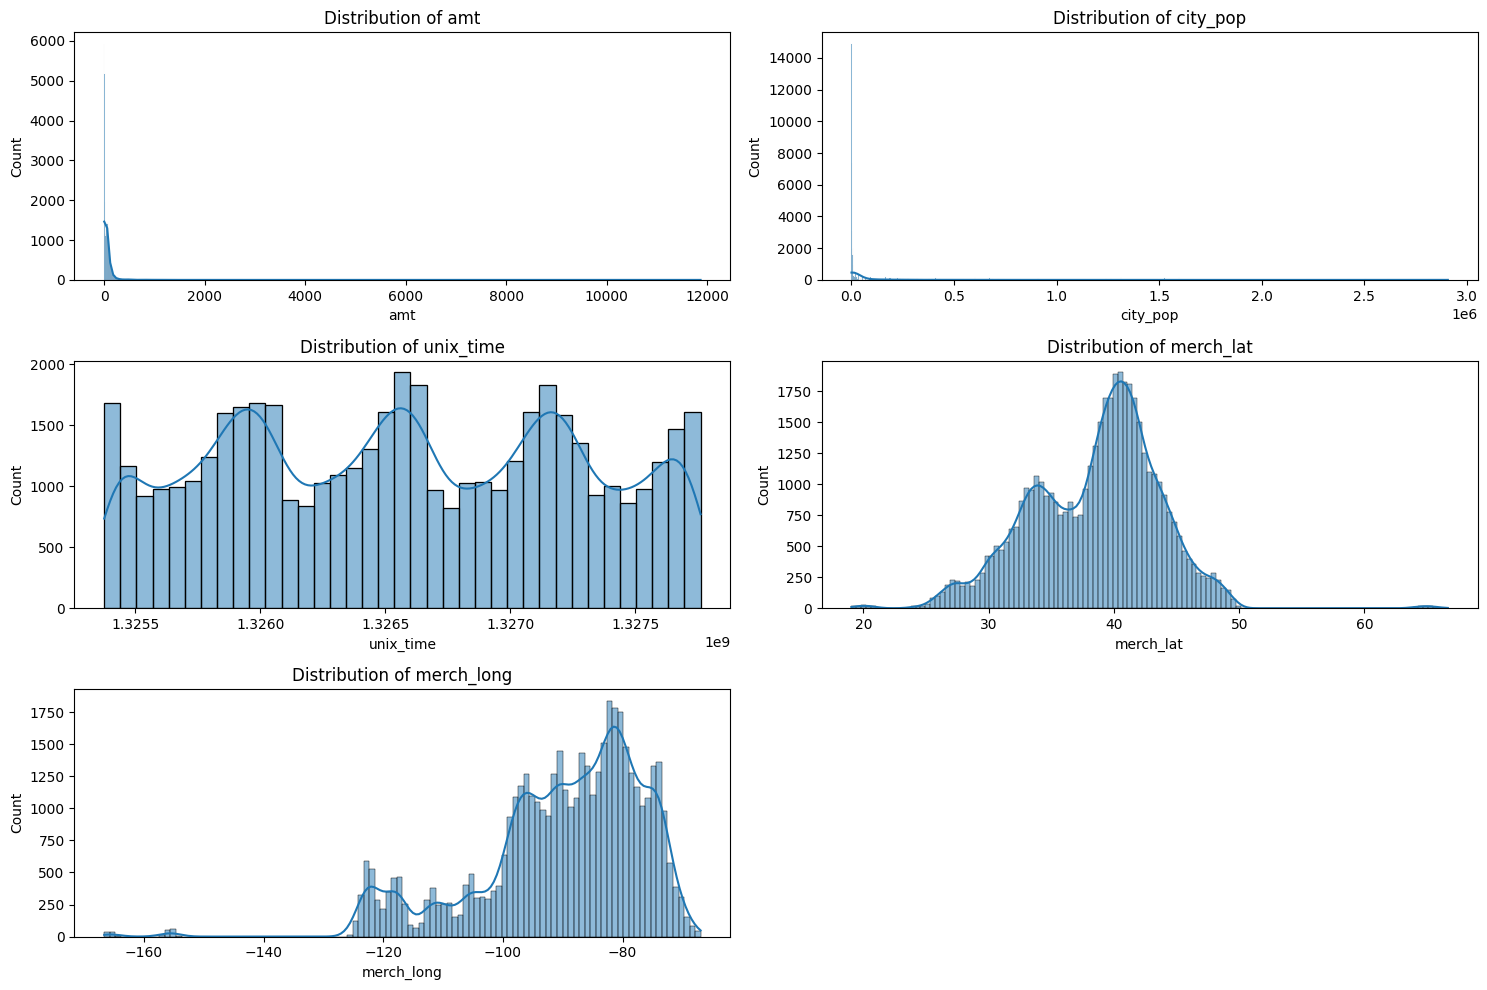

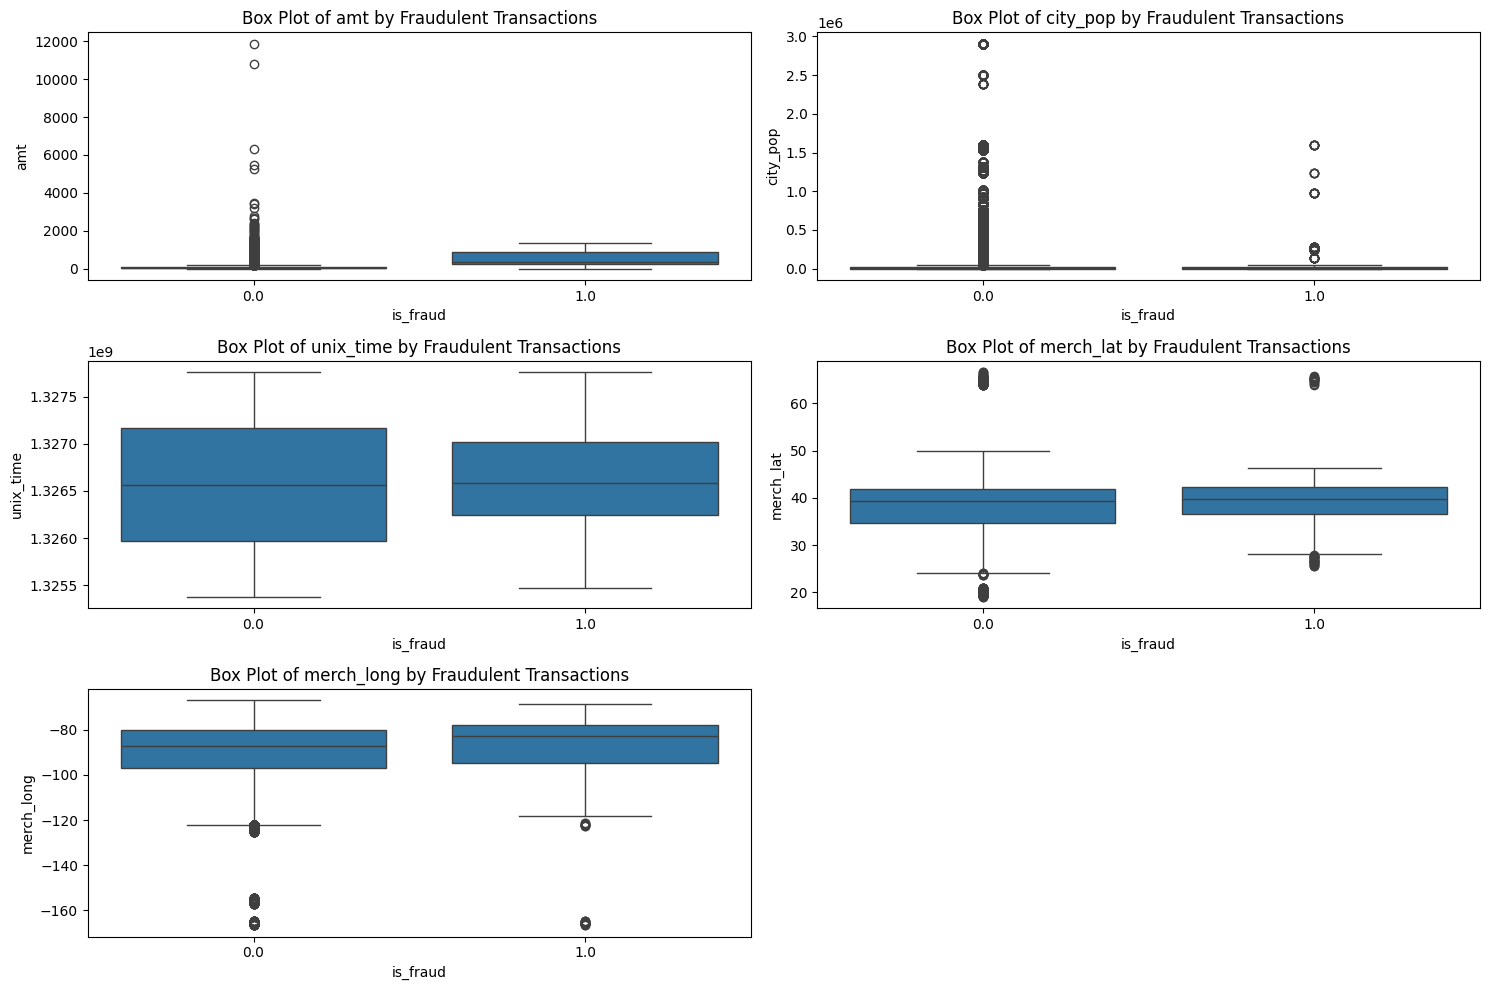

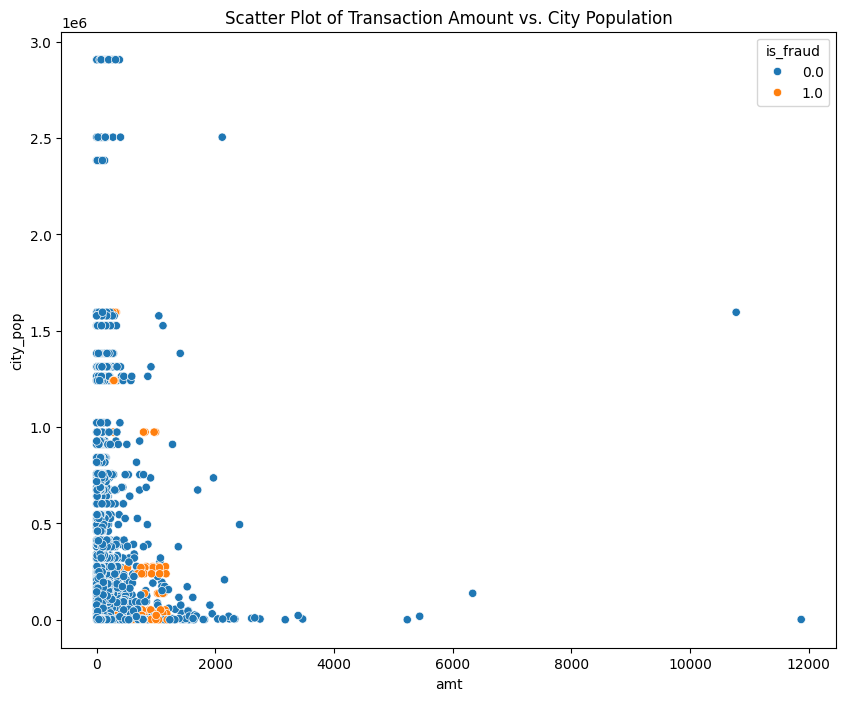

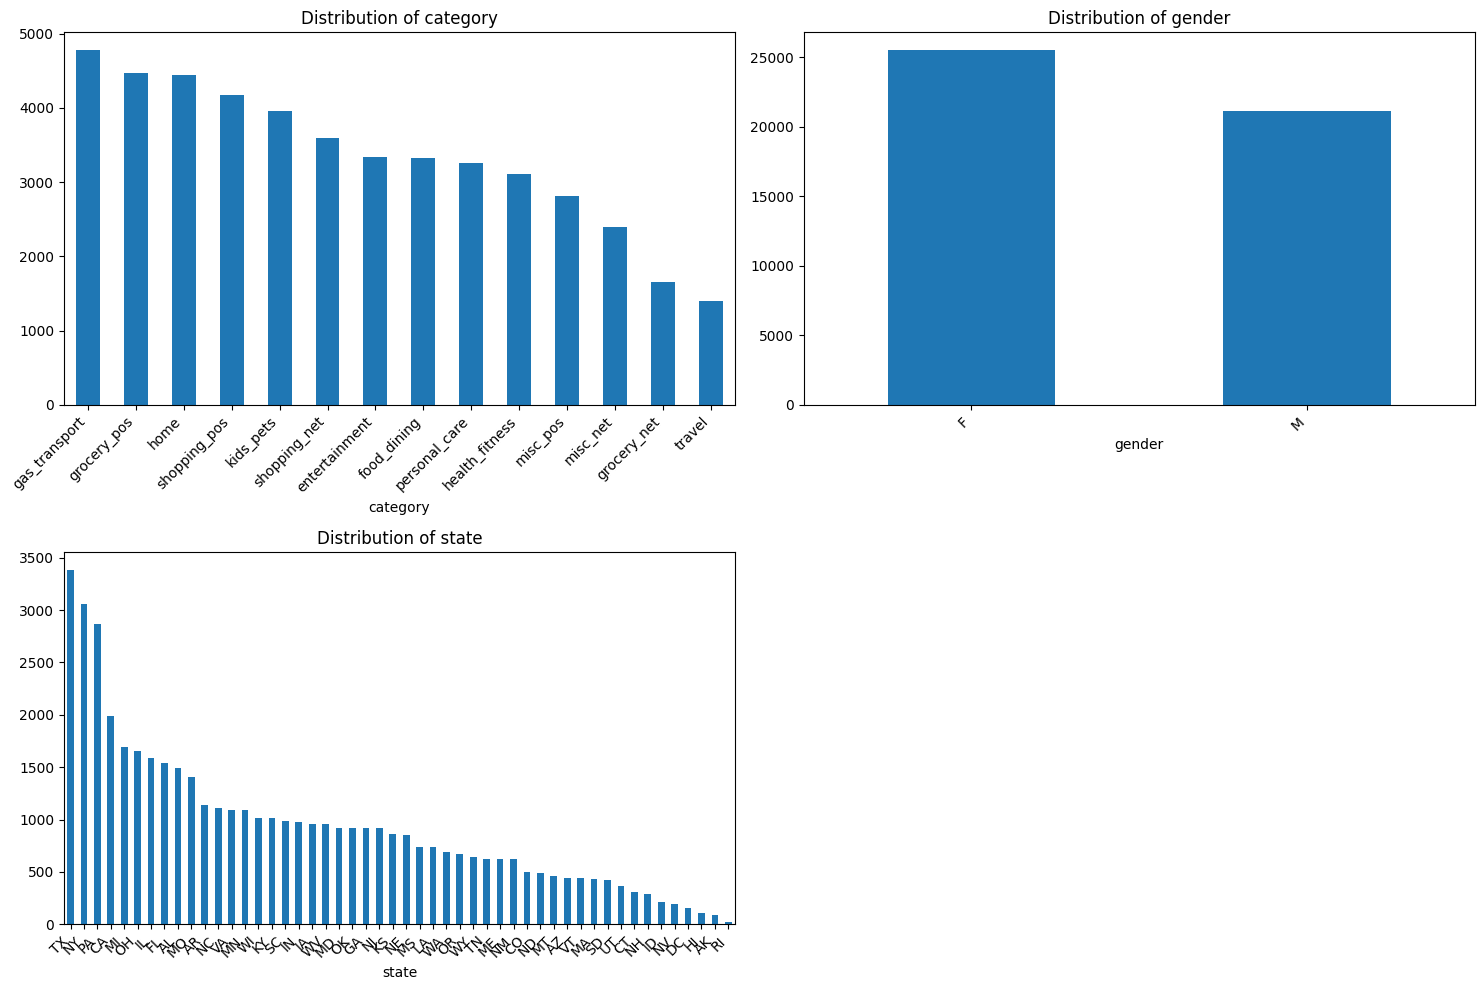

<Figure size 1200x600 with 0 Axes>

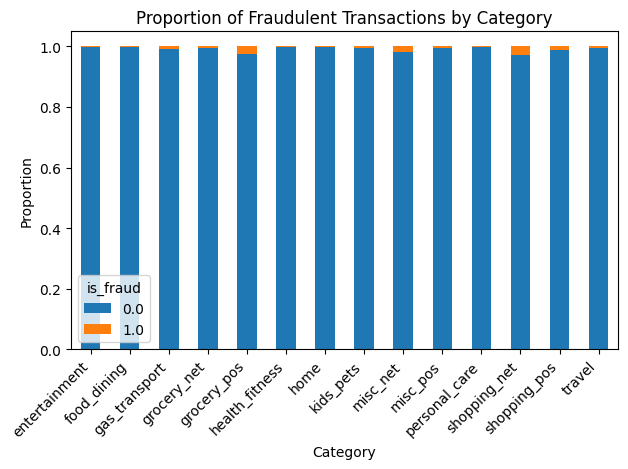

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for key numerical features
numerical_features = ['amt', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df_train[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


# Box plots for numerical features, comparing fraudulent and non-fraudulent transactions
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
  plt.subplot(3, 2, i + 1)
  sns.boxplot(x='is_fraud', y=col, data=df_train)
  plt.title(f'Box Plot of {col} by Fraudulent Transactions')
plt.tight_layout()
plt.show()


# Scatter plots to explore relationships between pairs of numerical features
plt.figure(figsize=(10, 8))
sns.scatterplot(x='amt', y='city_pop', hue='is_fraud', data=df_train)
plt.title('Scatter Plot of Transaction Amount vs. City Population')
plt.show()

# Visualize distribution of categorical variables
categorical_cols = ['category', 'gender', 'state']
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 2, i + 1)
    df_train[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Relationship between is_fraud and other features
plt.figure(figsize=(12,6))
df_train.groupby('category')['is_fraud'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
plt.title('Proportion of Fraudulent Transactions by Category')
plt.xlabel('Category')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()